# MNS - CP - 6. Problem Set
_Assignment 6 (The Gate Model)_

### Ahmed Abdalfatah - Alice Mahraffa

## 1) Potassium Channel (K+)

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

K_REVERSAL = -77        # mV
K_CONDUC = 36*10**-6    # Siemens (should've been ^-9 but multiplied with 1000 to compensate for using milli votls)

def alpha_n(voltage):
    return (0.01* (voltage +  55)) / (1 - np.exp(-0.1 * (voltage + 55) ))

def beta_n(voltage):
    return 0.125 * np.exp(-0.0125 * (voltage + 65) )

def k_current(voltage, prob):
    return K_CONDUC * prob**4 * (voltage - K_REVERSAL)


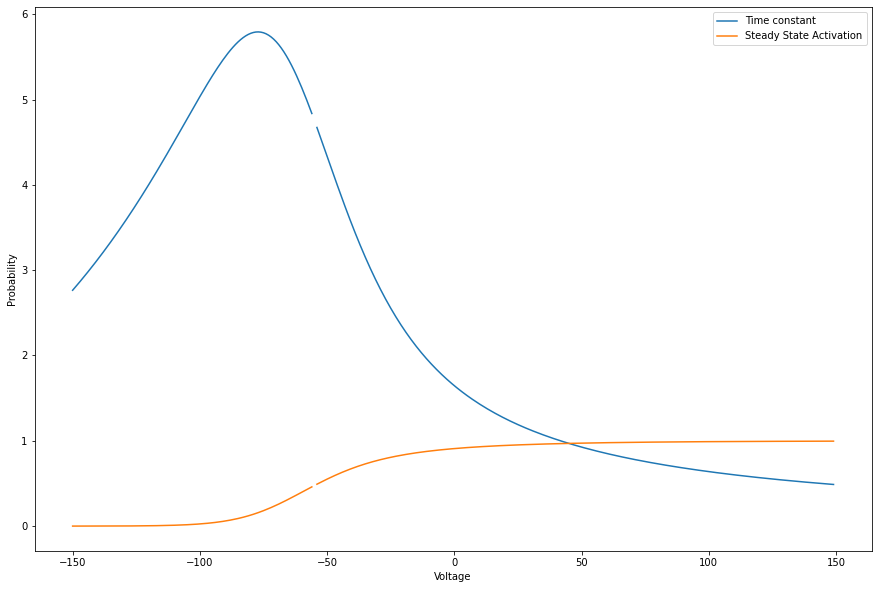

The steady state at -40mV


0.6785909741451827

In [60]:
def steady_state_activation(voltage):
    return alpha_n(voltage) / (alpha_n(voltage) + beta_n(voltage))

def time_constant(voltage):
    return 1 / (alpha_n(voltage) + beta_n(voltage))

voltages = np.arange(-150, 150, 1)

# Plotting time constant and n
plt.figure(figsize=(15, 10))
plt.plot(voltages, [time_constant(v) for v in voltages], label = "Time constant")
plt.plot(voltages, [steady_state_activation(v) for v in voltages], label = "Steady State Activation")
plt.xlabel("Voltage")
plt.ylabel("Probability")
plt.legend()
plt.show()

# The steady state at -40mV
print("The steady state at -40mV")
steady_state_activation(-40)

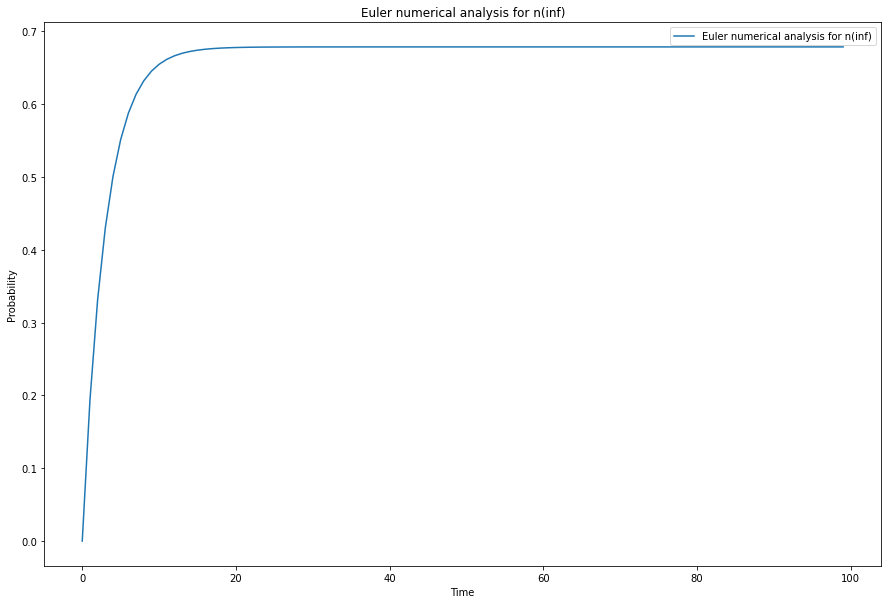

The probability at 23 seconds:


0.678283967180255

In [59]:
def change_in_prob(prob, voltage):
    return (alpha_n(voltage) * (1 - prob)) - (beta_n(voltage) * prob)

def euler(f_func, initial_value, t_max, dt, voltage_c=-40, clamp=False):
    t=dt
    initial_voltage = -65 if clamp else voltage_c
    x_values=[initial_value]
    current_values = [k_current(initial_voltage, initial_value)]
    while(t<=t_max):
        voltage = initial_voltage if t<2 else voltage_c
        new_prob_value = x_values[-1] + f_func(x_values[-1], voltage=voltage)*dt
        x_values.append(new_prob_value)
        current_values.append(k_current(voltage, new_prob_value))
        t += dt
    return x_values[:-1], current_values[:-1]

voltage = -40
change_in_prob_euler, current_values = euler(change_in_prob, 0, 100, 1, voltage_c=-40)
x_axis = np.arange(0, len(change_in_prob_euler), 1)

plt.figure(figsize=(15, 10))
plt.plot(x_axis, change_in_prob_euler, label="Euler numerical analysis for n(inf)")
plt.title("Euler numerical analysis for n(inf)")
plt.xlabel("Time")
plt.ylabel("Probability")
plt.legend()
plt.show()

# The probability at 23 seconds
print("The probability at 23 seconds:")
change_in_prob_euler[23]

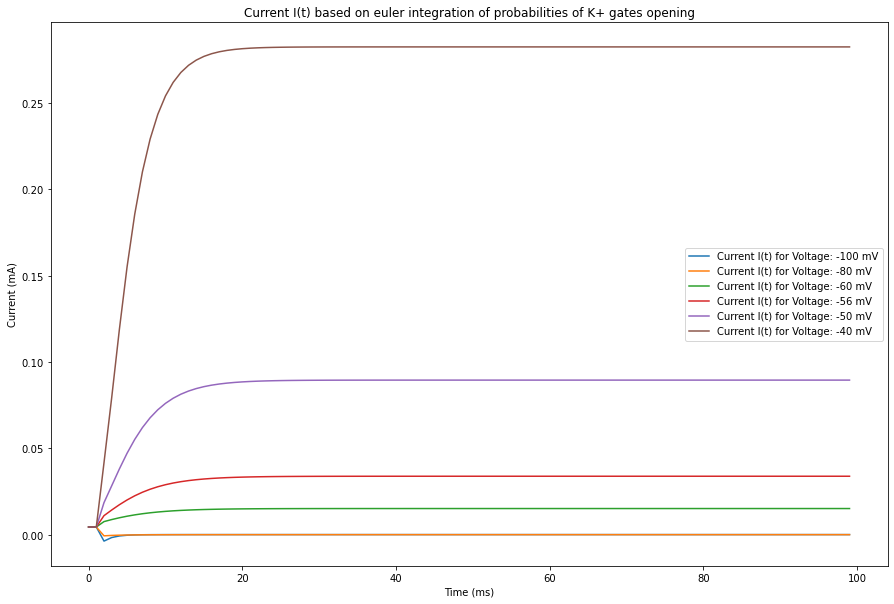


- The lower the voltage, the more potassium can move outside of the cell (along its concentration gradient). 
  Which causes the membrane voltage to be more positive.

- The steady state graph shows that activation of K+ gates starts increasing at around -70mV and peaks at around -40



In [69]:
# (d) VOLTAGE CLAMP

# Starting with voltage
def plot_current_for_voltage_clamp(voltage):
    change_in_prob_euler, current_values = euler(change_in_prob, 0.3177, 100, 1, voltage_c=voltage, clamp=True)
    x_axis = np.arange(0, len(current_values), 1)

    label = "Current I(t) for Voltage: {} mV".format(voltage)
    plt.plot(x_axis, [i*1000 for i in current_values], label=label)
    plt.xlabel("Time (ms)")
    plt.ylabel("Current (mA)")
    plt.title("Current I(t) based on euler integration of probabilities of K+ gates opening".format(voltage))

plt.figure(figsize=(15, 10))
plot_current_for_voltage_clamp(-100)
plot_current_for_voltage_clamp(-80)
plot_current_for_voltage_clamp(-60)
plot_current_for_voltage_clamp(-56)
plot_current_for_voltage_clamp(-50)
plot_current_for_voltage_clamp(-40)
plt.legend()
plt.show()


print("""
- The higher the voltage, the more potassium can move outside of the cell (along its concentration gradient). 
  Which causes the membrane voltage to be more positive.

- The steady state graph shows that activation of K+ gates starts increasing at around -70mV and peaks at around -40
""")

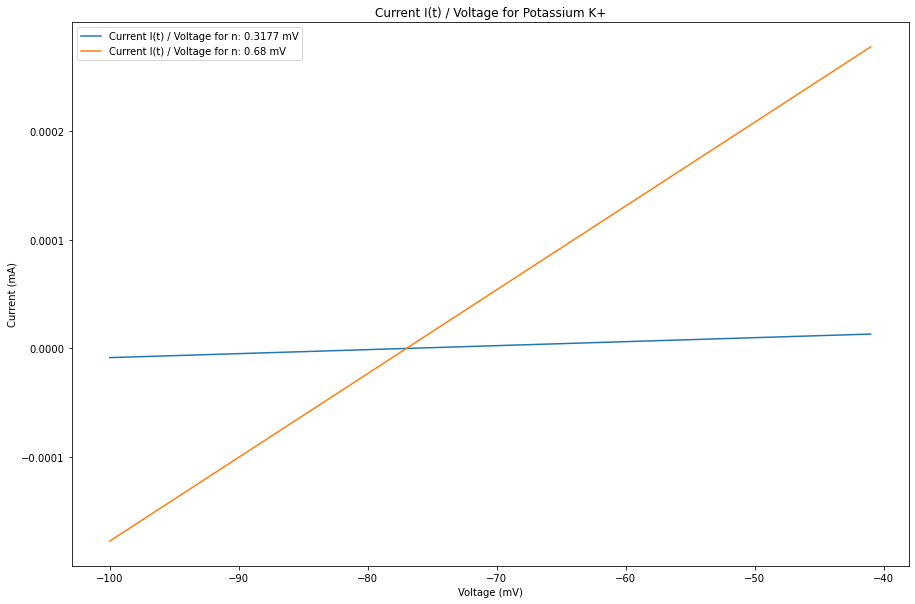

In [72]:
# (d) Current-Voltage plot
def plot_i_v(n):
    voltages = np.arange(-100,-40, 1)
    currents = [k_current(v, n) for v in voltages]
    
    label = "Current I(t) / Voltage for n: {} mV".format(n)
    plt.plot(voltages, currents, label=label)
    plt.xlabel("Voltage (mV)")
    plt.ylabel("Current (mA)")
    plt.title("Current I(t) / Voltage for Potassium K+")

plt.figure(figsize=(15,10))
plot_i_v(0.3177)
plot_i_v(0.68)
plt.legend()
plt.show()

-------------------------------------


## 2. Sodium ion channels

now we have two and not just one gating variable (m and h)

### a) Preparing variables and plotting gating variables

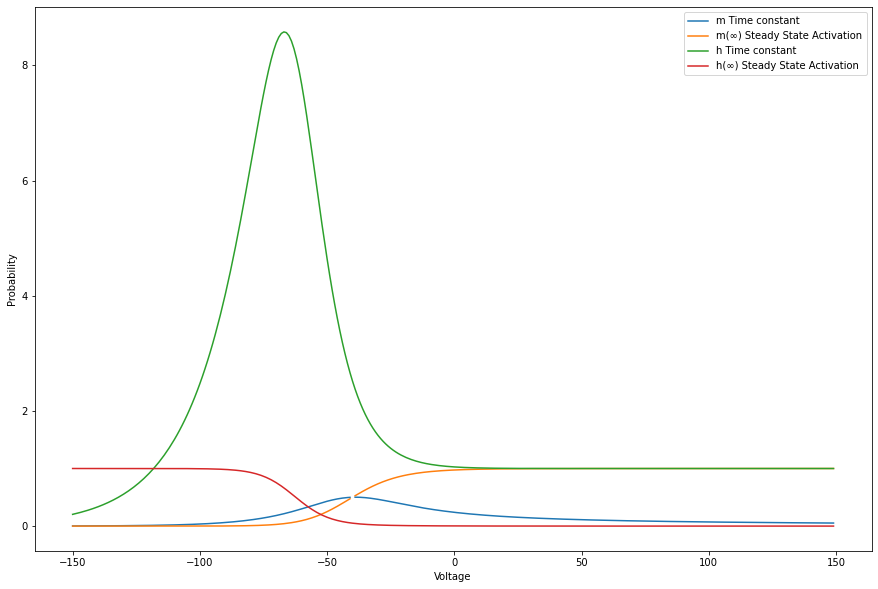

The steady state at -40mV

From the graph, we can see that:
  - m time constant increases slightly with depolarization and goes down again
  - m(∞) increases with depolarization
  - h time constant increases rapidly (spikes) with depolarization (around -60)
  - h(∞) decreases with depolarization
  
m(∞) behaves similar to n(∞) and h(∞) is the opposite of them. h time constant is the fastest variable.



In [95]:
NA_REVERSAL = 50          # mV
NA_CONDUC = 120*10**-6    # Siemens (should've been ^-9 but multiplied with 1000 to compensate for using milli votls)

def alpha_m(voltage):
    return 0.1 * (voltage + 40) / (1 - np.exp(-0.1*(voltage+40)))

def alpha_h(voltage):
    return 0.07 * np.exp(-0.05*(voltage+65))

def beta_m(voltage):
    return 4 * np.exp(-0.0556*(voltage + 65))

def beta_h(voltage):
    return 1/(1 + np.exp(-0.1*(voltage + 35)))

def NA_current(voltage, m, h):
    return NA_CONDUC * m**3 * h * (voltage - NA_REVERSAL)


def m_steady_state_activation(voltage):
    return alpha_m(voltage) / (alpha_m(voltage) + beta_m(voltage))

def h_steady_state_activation(voltage):
    return alpha_h(voltage) / (alpha_h(voltage) + beta_h(voltage))

def m_time_constant(voltage):
    return 1 / (alpha_m(voltage) + beta_m(voltage))

def h_time_constant(voltage):
    return 1 / (alpha_h(voltage) + beta_h(voltage))


voltages = np.arange(-150, 150, 1)

# Plotting time constant and n
plt.figure(figsize=(15, 10))
plt.plot(voltages, [m_time_constant(v) for v in voltages], label = "m Time constant")
plt.plot(voltages, [m_steady_state_activation(v) for v in voltages], label = "m(∞) Steady State Activation")
plt.plot(voltages, [h_time_constant(v) for v in voltages], label = "h Time constant")
plt.plot(voltages, [h_steady_state_activation(v) for v in voltages], label = "h(∞) Steady State Activation")
plt.xlabel("Voltage")
plt.ylabel("Probability")
plt.legend()
plt.show()

# The steady state at -40mV
print("The steady state at -40mV")
steady_state_activation(-40)

print("""
From the graph, we can see that:
  - m time constant increases slightly with depolarization and goes down again
  - m(∞) increases with depolarization
  - h time constant increases rapidly (spikes) with depolarization (around -60)
  - h(∞) decreases with depolarization
  
m(∞) behaves similar to n(∞) and h(∞) is the opposite of them. h time constant is the fastest variable.
""")

### b) Current simulation with regard to time.

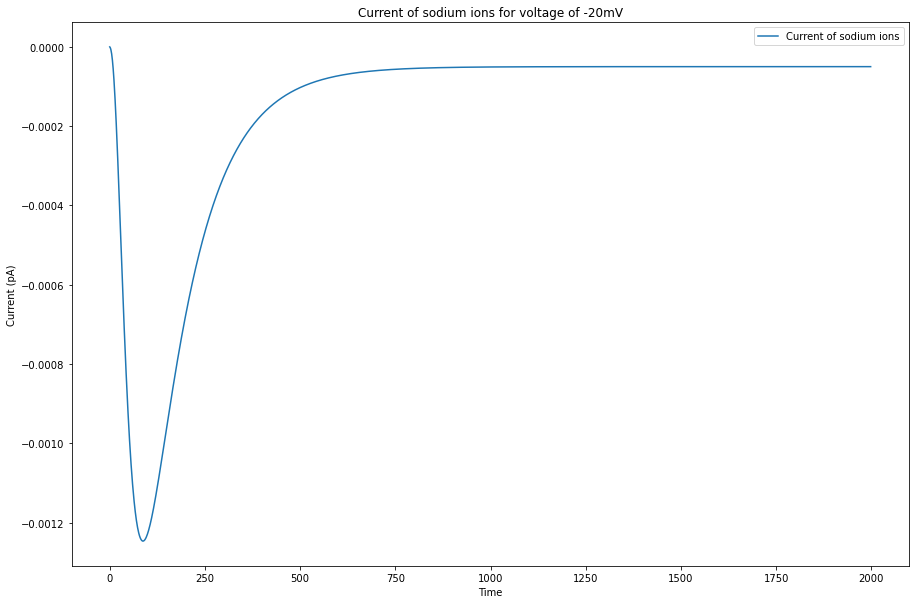

m steady state: 0.8759110912779998
h steady state: 0.00894583739395112
The minimum, the terminal current value


(-0.001225862726535207, -5.049871915958371e-05)

In [131]:
def change_in_m(m, voltage):
    return (alpha_m(voltage) * (1 - m)) - (beta_m(voltage) * m)

def change_in_h(h, voltage):
    return (alpha_h(voltage) * (1 - h)) - (beta_h(voltage) * h)

def euler(initial_m, initial_h, t_max, dt, voltage_c=-40, clamp=False):
    t=dt
    initial_voltage = -65 if clamp else voltage_c
    m_values=[initial_m]
    h_values=[initial_h]
    current_values = [NA_current(initial_voltage, initial_m, initial_h)]
    while(t<=t_max):
        voltage = initial_voltage if t<2 else voltage_c
        new_m_value = m_values[-1] + change_in_m(m_values[-1], voltage)*dt
        new_h_value = h_values[-1] + change_in_h(h_values[-1], voltage)*dt
        m_values.append(new_m_value)
        h_values.append(new_h_value)
        current_values.append(NA_current(voltage, new_m_value, new_h_value))
        t += dt
    return m_values[:-1], h_values[:-1], current_values[:-1]

voltage = -40
initial_m = 0.0529
initial_h = 0.5961
delta_ms, delta_hs, delta_current_values = euler(initial_m, initial_h, 20, 0.01, voltage_c=-20, clamp=False)
x_axis = np.arange(0, len(delta_current_values), 1)

plt.figure(figsize=(15, 10))
plt.plot(x_axis, [i for i in delta_current_values], label="Current of sodium ions")
plt.title("Current of sodium ions for voltage of -20mV")
plt.xlabel("Time")
plt.ylabel("Current (pA)")
plt.legend()
plt.show()

print("m steady state: {}".format(delta_ms[1500]))
print("h steady state: {}".format(delta_hs[1500]))

print("The minimum, the terminal current value")
delta_current_values[100], delta_current_values[1500]

### c) Voltage Clamp for sodium ion channels

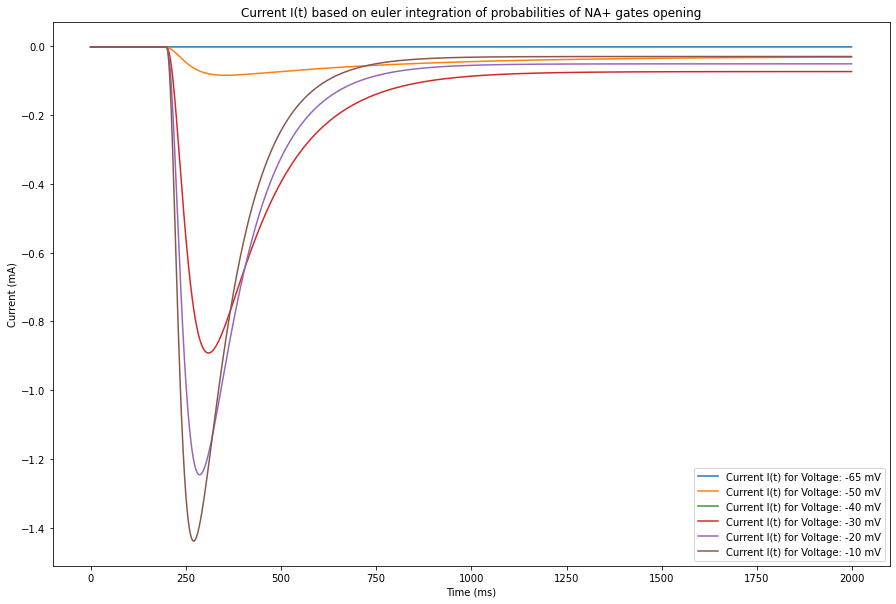


- Depolarization causes voltage gated sodium channels to be triggered that pumps sodium



In [130]:
initial_m = 0.0529
initial_h = 0.5961

def plot_current_for_voltage_clamp_na(voltage):
    change_in_m, change_in_h, current_values = euler(initial_m, initial_h, 20, 0.01, voltage_c=voltage, clamp=True)
    x_axis = np.arange(0, len(current_values), 1)

    label = "Current I(t) for Voltage: {} mV".format(voltage)
    plt.plot(x_axis, [i*1000 for i in current_values], label=label)
    plt.xlabel("Time (ms)")
    plt.ylabel("Current (mA)")
    plt.title("Current I(t) based on euler integration of probabilities of NA+ gates opening".format(voltage))


plt.figure(figsize=(15, 10))
plot_current_for_voltage_clamp_na(-65)
plot_current_for_voltage_clamp_na(-50)
plot_current_for_voltage_clamp_na(-40)
plot_current_for_voltage_clamp_na(-30)
plot_current_for_voltage_clamp_na(-20)
plot_current_for_voltage_clamp_na(-10)
plt.legend()
plt.show()


print("""
- Depolarization causes voltage gated sodium channels to be triggered that pumps sodium
""")

### d) Voltage-Current graph


We can see that with the initial values the current doesn't really change much with the voltage.
However, with the steady values the current has a high slope against the voltage and is decreasing rapidly with changes in voltage.

Comparing wit Potassium, it
- shows similar behaviour in the sense that both have decreasing current
- different because in potassium the current is flipped



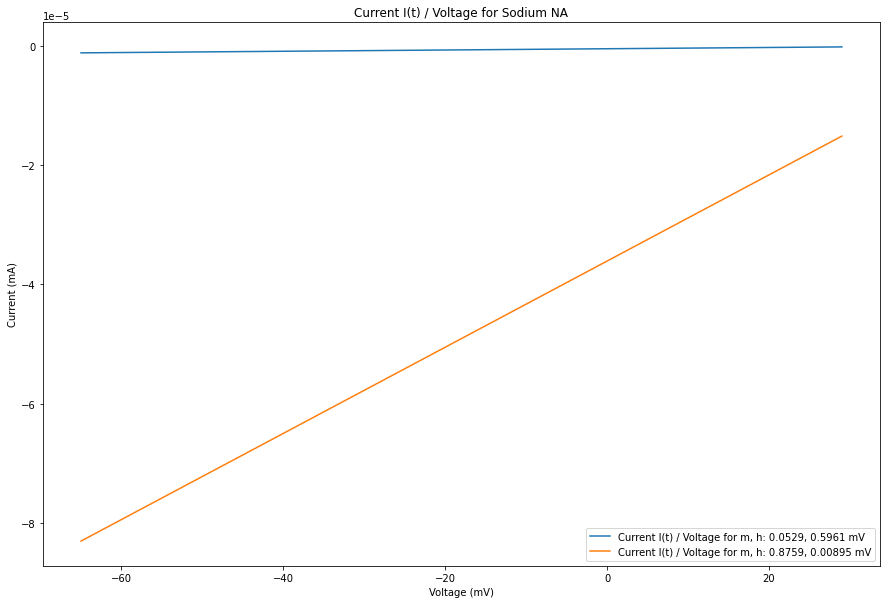

In [137]:
def plot_na_i_v(m, h):
    voltages = np.arange(-65,30, 1)
    currents = [NA_current(v, m, h) for v in voltages]
    
    label = "Current I(t) / Voltage for m, h: {}, {} mV".format(m, h)
    plt.plot(voltages, currents, label=label)
    plt.xlabel("Voltage (mV)")
    plt.ylabel("Current (mA)")
    plt.title("Current I(t) / Voltage for Sodium NA")

initial_m = 0.0529
initial_h = 0.5961
    
steady_m = 0.8759
steady_h = 0.00895

print("""
We can see that with the initial values the current doesn't really change much with the voltage.
However, with the steady values the current has a high slope against the voltage and is decreasing rapidly with changes in voltage.

Comparing wit Potassium, it
- shows similar behaviour in the sense that both have decreasing current
- different because in potassium the current is flipped while the sodium current seems to decrease without flipping as the
  membrane depolarizes.
""")
    
plt.figure(figsize=(15,10))
plot_na_i_v(initial_m, initial_h)
plot_na_i_v(steady_m, steady_h)
plt.legend()
plt.show()